In [ ]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

In [6]:
# citpy to determine city based on latitude and longitude
from citipy import citipy

from config import WEATHER_API_KEY

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [9]:
df = pd.DataFrame(cities)
df.head()

,0
0,hermanus
1,prince rupert
2,margate
3,vestmannaeyjar
4,mahebourg


In [10]:
OW_Endpoint = "https://api.openweathermap.org/data/2.5/weather"
data = []
i = 0
while i < len(cities):
    params = {
        "q": cities[i],
        "appid": WEATHER_API_KEY
    }
    response = requests.get(url=OW_Endpoint, params=params)
    data.append(response.json())
    if (i +1) % 60 == 0:
        time.sleep(5)
    i += 1
    
    

pprint(data)

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -34.4187, 'lon': 19.2345},
  'dt': 1612210759,
  'id': 3366880,
  'main': {'feels_like': 290.46,
           'humidity': 76,
           'pressure': 1020,
           'temp': 290.93,
           'temp_max': 290.93,
           'temp_min': 290.93},
  'name': 'Hermanus',
  'sys': {'country': 'ZA',
          'id': 2006131,
          'sunrise': 1612152225,
          'sunset': 1612201767,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 105, 'gust': 4.02, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 54.3161, 'lon': -130.3201},
  'dt': 1612210760,
  'id': 6113406,
  'main': {'feels_like': 276.2,
           'humidity': 87,
           'pressure': 1009,
           'temp': 278.68,
           'temp_max': 281.

  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -33.65, 'lon': 115.3333},
  'dt': 1612210784,
  'id': 2075265,
  'main': {'feels_like': 289.63,
           'humidity': 76,
           'pressure': 1015,
           'temp': 290.06,
           'temp_max': 290.93,
           'temp_min': 288.71},
  'name': 'Busselton',
  'sys': {'country': 'AU',
          'id': 2008303,
          'sunrise': 1612215692,
          'sunset': 1612264985,
          'type': 3},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 63, 'gust': 4.47, 'speed': 1.79}},
 {'base': 'stations',
  'clouds': {'all': 95},
  'cod': 200,
  'coord': {'lat': -24.8667, 'lon': 113.6333},
  'dt': 1612210784,
  'id': 2074865,
  'main': {'feels_like': 300.39,
           'humidity': 58,
           'pressure': 1001,
           'temp': 302.15,
           'temp_max': 302.15,
           'temp_

          'sunset': 1612225162,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 110, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 35.3029, 'lon': 37.1841},
  'dt': 1612210826,
  'id': 172515,
  'main': {'feels_like': 279.18,
           'grnd_level': 973,
           'humidity': 73,
           'pressure': 1024,
           'sea_level': 1024,
           'temp': 283.19,
           'temp_max': 283.19,
           'temp_min': 283.19},
  'name': 'Abu Samrah',
  'sys': {'country': 'SY', 'sunrise': 1612153840, 'sunset': 1612191535},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 87, 'speed': 4.25}},
 {'base': 'stations',
  'clouds': {'

               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 23, 'speed': 1.8}},
 {'base': 'stations',
  'clouds': {'all': 23},
  'cod': 200,
  'coord': {'lat': 73.5069, 'lon': 80.5464},
  'dt': 1612210853,
  'id': 1507390,
  'main': {'feels_like': 234.71,
           'grnd_level': 1022,
           'humidity': 84,
           'pressure': 1028,
           'sea_level': 1028,
           'temp': 242.77,
           'temp_max': 242.77,
           'temp_min': 242.77},
  'name': 'Dikson',
  'sys': {'country': 'RU', 'sunrise': 1612245169, 'sunset': 1612252207},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 118, 'speed': 5.99}},
 {'base': 'stations',
  'clouds': {'all': 91},
  'cod': 200,
  'coord': {'lat': 3.0707, 'lon': 172.7902},
  'dt': 1612210853,
  'id': 2110227,
  'main': {'feels_like': 301.49,
           'grnd_level': 1006,

  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 45.6169, 'lon': -61.3485},
  'dt': 1612210891,
  'id': 6111867,
  'main': {'feels_like': 266.66,
           'humidity': 74,
           'pressure': 1027,
           'temp': 270.84,
           'temp_max': 271.48,
           'temp_min': 270.15},
  'name': 'Port Hawkesbury',
  'sys': {'country': 'CA',
          'id': 876,
          'sunrise': 1612178792,
          'sunset': 1612213884,
          'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 340, 'speed': 2.06}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -46.2817, 'lon': 169.8464},
  'dt': 1612210893,
  'id': 2208248,
  'main': {'feels_like': 286.97,
           'grnd_level': 1017,
           'humidity': 69,
           'pressure': 1018,


  'dt': 1612210917,
  'id': 5055787,
  'main': {'feels_like': 264.17,
           'humidity': 80,
           'pressure': 1028,
           'temp': 270.12,
           'temp_max': 270.37,
           'temp_min': 269.82},
  'name': 'Kirksville',
  'sys': {'country': 'US',
          'id': 4545,
          'sunrise': 1612185539,
          'sunset': 1612222132,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 4.63}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': -46.1333, 'lon': 167.6833},
  'dt': 1612210918,
  'id': 2180815,
  'main': {'feels_like': 287.41,
           'grnd_level': 1015,
           'humidity': 74,
           'pressure': 1018,
           'sea_level': 1018,
           'temp': 288.6,
           'temp_max': 288.6,
           'temp_min': 288.6},
  'name': 'Tuatape

           'temp_max': 271.15,
           'temp_min': 271.15},
  'name': 'Shaunavon',
  'sys': {'country': 'CA',
          'id': 224,
          'sunrise': 1612190739,
          'sunset': 1612224532,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 5.14}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -33.0117, 'lon': 17.9442},
  'dt': 1612210934,
  'id': 3361934,
  'main': {'feels_like': 291.89,
           'humidity': 52,
           'pressure': 1013,
           'temp': 294.15,
           'temp_max': 294.15,
           'temp_min': 294.15},
  'name': 'Saldanha',
  'sys': {'country': 'ZA',
          'id': 1943,
          'sunrise': 1612152693,
          'sunset': 1612201919,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'cl

           'temp': 295.38,
           'temp_max': 295.38,
           'temp_min': 295.38},
  'name': 'Eyl',
  'sys': {'country': 'SO', 'sunrise': 1612148438, 'sunset': 1612190874},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 39, 'speed': 6.5}},
 {'base': 'stations',
  'clouds': {'all': 96},
  'cod': 200,
  'coord': {'lat': 48.9886, 'lon': 22.151},
  'dt': 1612210946,
  'id': 723559,
  'main': {'feels_like': 267,
           'humidity': 90,
           'pressure': 1008,
           'temp': 270.37,
           'temp_max': 270.37,
           'temp_min': 270.37},
  'name': 'Snina',
  'sys': {'country': 'SK',
          'id': 2019485,
          'sunrise': 1612159316,
          'sunset': 1612193276,
          'type': 3},
  'timezone': 3600,
  'visibility': 2530,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
         

 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 51.4667, 'lon': 140.7833},
  'dt': 1612210963,
  'id': 2126018,
  'main': {'feels_like': 240.03,
           'grnd_level': 1006,
           'humidity': 84,
           'pressure': 1006,
           'sea_level': 1006,
           'temp': 246.24,
           'temp_max': 246.24,
           'temp_min': 246.24},
  'name': 'De-Kastri',
  'sys': {'country': 'RU', 'sunrise': 1612217640, 'sunset': 1612250820},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 3.42}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 6.4965, 'lon': 2.6036},
  'dt': 1612210963,
  'id': 2392087,
  'main': {'feels_like': 305.62,
           'humidity': 84,
           'pressure': 1010,
           'temp': 302.15,
           'temp_max': 302.15,
       

  'wind': {'deg': 339, 'speed': 0.57}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 40.602, 'lon': 43.095},
  'dt': 1612210985,
  'id': 743952,
  'main': {'feels_like': 258.59,
           'humidity': 92,
           'pressure': 1025,
           'temp': 262.15,
           'temp_max': 262.15,
           'temp_min': 262.15},
  'name': 'Kars',
  'sys': {'country': 'TR',
          'id': 6993,
          'sunrise': 1612153049,
          'sunset': 1612189489,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 0, 'speed': 0.51}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 35.7333, 'lon': 140.8333},
  'dt': 1612210986,
  'id': 2112802,
  'main': {'feels_like': 278.33,
           'humidity': 88,
           'pressure': 1005,
           'temp': 283.1,
           'te

  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 86, 'speed': 5.87}},
 {'base': 'stations',
  'clouds': {'all': 12},
  'cod': 200,
  'coord': {'lat': 11.6667, 'lon': 92.75},
  'dt': 1612211010,
  'id': 1259385,
  'main': {'feels_like': 299.41,
           'grnd_level': 1012,
           'humidity': 79,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 298.64,
           'temp_max': 298.64,
           'temp_min': 298.64},
  'name': 'Port Blair',
  'sys': {'country': 'IN', 'sunrise': 1612224805, 'sunset': 1612266713},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 17, 'speed': 5.3}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 54.2331, 'lon': -125.7533},
  'dt': 1612211011,
  

               'main': 'Clouds'}],
  'wind': {'deg': 224, 'speed': 4.81}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': -35.6167, 'lon': 174.5},
  'dt': 1612211053,
  'id': 2186111,
  'main': {'feels_like': 292.68,
           'humidity': 82,
           'pressure': 1018,
           'temp': 292.04,
           'temp_max': 292.04,
           'temp_min': 292.04},
  'name': 'Ngunguru',
  'sys': {'country': 'NZ',
          'id': 2012217,
          'sunrise': 1612201259,
          'sunset': 1612251016,
          'type': 3},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 124, 'gust': 3.58, 'speed': 1.79}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -5.1833, 'lon': -68.9},
  'dt': 1612211054,
  'id': 3663693,
  'main': {'feels_like': 308.76,
           'grnd_level': 995,
         

  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 152, 'gust': 8.94, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 18},
  'cod': 200,
  'coord': {'lat': 16.3998, 'lon': 103.3679},
  'dt': 1612211093,
  'id': 1604797,
  'main': {'feels_like': 296.78,
           'humidity': 73,
           'pressure': 1014,
           'temp': 295.15,
           'temp_max': 295.15,
           'temp_min': 295.15},
  'name': 'Yang Talat',
  'sys': {'country': 'TH',
          'id': 9288,
          'sunrise': 1612222619,
          'sunset': 1612263802,
          'type': 1},
  'timezone': 25200,
  'visibility': 9000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 70, 'speed': 1.03}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord

          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 90, 'speed': 4.63}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 33.194, 'lon': -82.5271},
  'dt': 1612211124,
  'id': 4231997,
  'main': {'feels_like': 273.79,
           'humidity': 57,
           'pressure': 1009,
           'temp': 280.22,
           'temp_max': 280.37,
           'temp_min': 280.15},
  'name': 'Avera',
  'sys': {'country': 'US',
          'id': 2827,
          'sunrise': 1612182332,
          'sunset': 1612220510,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 6.17}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 2

  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 103, 'speed': 1.56}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 39.2519, 'lon': 9.1794},
  'dt': 1612211174,
  'id': 2523666,
  'main': {'feels_like': 284.58,
           'humidity': 67,
           'pressure': 1007,
           'temp': 288.36,
           'temp_max': 288.71,
           'temp_min': 288.15},
  'name': 'Quartucciu',
  'sys': {'country': 'IT',
          'id': 6720,
          'sunrise': 1612161015,
          'sunset': 1612197805,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 340, 'speed': 5.14}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 24.7, 

           'humidity': 69,
           'pressure': 1006,
           'temp': 271.48,
           'temp_max': 271.48,
           'temp_min': 271.48},
  'name': 'Asău',
  'sys': {'country': 'RO',
          'id': 2033571,
          'sunrise': 1612157875,
          'sunset': 1612192677,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 263, 'speed': 0.39}},
 {'cod': '404', 'message': 'city not found'},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 41.7919, 'lon': 120.7792},
  'dt': 1612211225,
  'id': 2038342,
  'main': {'feels_like': 250.13,
           'grnd_level': 994,
           'humidity': 76,
           'pressure': 1030,
           'sea_level': 1030,
           'temp': 254.87,
           'temp_max': 254.87,
           'temp_min': 254.87},

  'wind': {'deg': 70, 'speed': 6.69}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 39.4547, 'lon': 75.9797},
  'dt': 1612211272,
  'id': 1280849,
  'main': {'feels_like': 264.3,
           'humidity': 59,
           'pressure': 1023,
           'temp': 270.15,
           'temp_max': 270.15,
           'temp_min': 270.15},
  'name': 'Kashgar',
  'sys': {'country': 'CN',
          'id': 9676,
          'sunrise': 1612231363,
          'sunset': 1612268206,
          'type': 1},
  'timezone': 28800,
  'visibility': 9000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 310, 'speed': 4}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 39.8885, 'lon': 4.2658},
  'dt': 1612211273,
  'id': 2514301,
  'main': {'feels_like': 284.3,
           'humidity': 76,
           'pressure': 1010,
           'temp': 285.15,
           'tem

In [11]:
len(data)

607

## Save data to weather_data.json

In [12]:
with open('weather_data.json', 'w') as jsonfile:
    json.dump(data, jsonfile)

## Read data from weather_data.json

In [13]:
with open('weather_data.json') as json_data:
    data = json.load(json_data)

pprint(data[0])

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.4187, 'lon': 19.2345},
 'dt': 1612210759,
 'id': 3366880,
 'main': {'feels_like': 290.46,
          'humidity': 76,
          'pressure': 1020,
          'temp': 290.93,
          'temp_max': 290.93,
          'temp_min': 290.93},
 'name': 'Hermanus',
 'sys': {'country': 'ZA',
         'id': 2006131,
         'sunrise': 1612152225,
         'sunset': 1612201767,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 105, 'gust': 4.02, 'speed': 2.24}}


In [20]:
df = pd.DataFrame({"City" : cities})
for name in ["Latitude", "Longitude", "Temperature F", "Humidity %", "Cloudiness %", "Wind Speed MPH"]:
    df[name] = ""
df.head()

,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,hermanus,,,,,,
1,prince rupert,,,,,,
2,margate,,,,,,
3,vestmannaeyjar,,,,,,
4,mahebourg,,,,,,


In [21]:
OW_Endpoint = "https://api.openweathermap.org/data/2.5/weather"

for index, row in df.iterrows():
    params = {
        "q": df.loc[index, "City"], # df.iloc[index, 0] would raise index error because drop() doesn't modify/reset index. 
        "appid": WEATHER_API_KEY,
        "units": "imperial"
    }
    try:
        response = requests.get(url=OW_Endpoint, params=params)
    except requests.exceptions.RequestException:
        # Drop current row if request raise errors
        df.drop(index, inplace=True)
    else:
        data = response.json()
        try: 
            df.loc[index, "Latitude"] = data["coord"]["lat"]
            df.loc[index, "Longitude"] = data["coord"]["lon"]
            df.loc[index, "Temperature F"] = data["main"]["temp"]
            df.loc[index, "Humidity %"] = data["main"]["humidity"]
            df.loc[index, "Cloudiness %"] = data["clouds"]["all"]
            df.loc[index, "Wind Speed MPH"] = data["wind"]["speed"]
        except (KeyError, IndexError): 
            # Drop current row if there is missing field/result
            df.drop(index, inplace=True)
    # The open weather API policy is 60 calls/minute, so wait for 5 seconds every 60 API calls
    if (index + 1) % 60 == 0:
        time.sleep(5)


In [22]:
df

,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,hermanus,-34.4187,19.2345,64,76,0,5.01
1,prince rupert,54.3161,-130.3201,41.94,87,90,3.44
2,margate,51.3813,1.3862,38.43,82,60,5.99
3,vestmannaeyjar,63.4427,-20.2734,39.16,72,99,27.56
4,mahebourg,-20.4081,57.7,80.6,83,40,8.05
...,...,...,...,...,...,...,...
602,parkes,-33.1333,148.1833,62.01,93,0,2.71
603,delijan,33.9905,50.6838,42.26,57,0,0.83
604,isabela,6.7085,121.9711,77.68,84,100,4.41
605,cabedelo,-6.9811,-34.8339,82.4,69,20,10.36


In [23]:
df.to_csv("weather_data.csv")

In [24]:
df=pd.read_csv("weather_data.csv")
df

,Unnamed: 0,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,0,hermanus,-34.4187,19.2345,64.00,76,0,5.01
1,1,prince rupert,54.3161,-130.3201,41.94,87,90,3.44
2,2,margate,51.3813,1.3862,38.43,82,60,5.99
3,3,vestmannaeyjar,63.4427,-20.2734,39.16,72,99,27.56
4,4,mahebourg,-20.4081,57.7000,80.60,83,40,8.05
...,...,...,...,...,...,...,...,...
559,602,parkes,-33.1333,148.1833,62.01,93,0,2.71
560,603,delijan,33.9905,50.6838,42.26,57,0,0.83
561,604,isabela,6.7085,121.9711,77.68,84,100,4.41
562,605,cabedelo,-6.9811,-34.8339,82.40,69,20,10.36


## Temperature (F) vs. Latitude

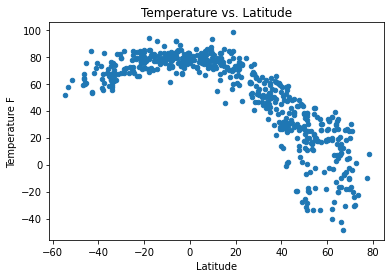

In [38]:
df.plot(x="Latitude", y="Temperature F", kind="scatter", title="Temperature vs. Latitude")
plt.savefig("images/temp_lat_scatter.png")

### Observation:
- In north hemisphere, it is obvious that the temperature drop when latitude increase.
- In South hemisphere, the chart doesn't show obvious relationship between temperature and latitude because there are very less cities picked between latitude -40 ~ -80.
    

## Humidity (%) vs. Latitude

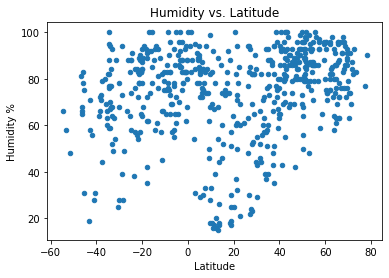

In [28]:
df.plot(x="Latitude", y="Humidity %", kind="scatter", title="Humidity vs. Latitude")
plt.savefig("images/humidity_lat_scatter.png")

### Observation
- There isn't obvious relationship between humidity and latitude

## Cloudiness % vs. Latitude

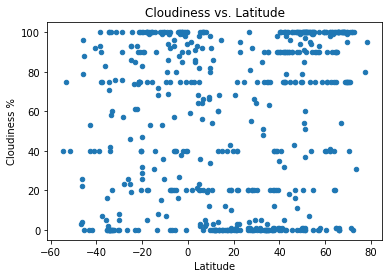

In [29]:
df.plot(x="Latitude", y="Cloudiness %", kind="scatter", title="Cloudiness vs. Latitude")
plt.savefig("images/cloudiness_lat_scatter.png")

### Observation
- There isn't obvious relationship between cloudiness and latitude

## Wind Speed vs. Latitude

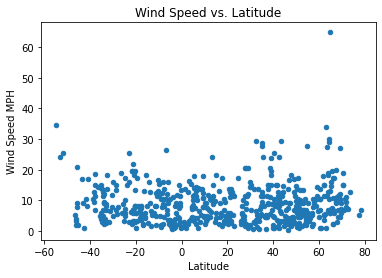

In [30]:
df.plot(x="Latitude", y="Wind Speed MPH", kind="scatter", title="Wind Speed vs. Latitude")
plt.savefig("images/wind_lat_scatter.png")

### Observation
- There isn't obvious relationship between wind speed and latitude

## Linear Regression

In [32]:
# Create a function to do linear regression
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
#     plt.figure(FigureClass=fig)
    plt.plot(x, regress_values, "r-")
    
    return line_eq, rvalue
#     if x.max() > 0:
#         plt.annotate(line_eq, (65, 105), fontsize=12, color="red")
#         plt.annotate()
#     if x.min() < 0:
#         plt.annotate(line_eq, (-80, 105), fontsize=12, color="red")

    
    

In [33]:
# Create a function to plot Northern Hemisphere and Southern Hemisphere
def regression_south_north(df, x_label, y_label):
    x_global = df[x_label].astype(float)
    y_global = df[y_label].astype(float)

    fig = plt.figure(figsize=(20,10))
    plt.scatter(x_global, y_global)
    plt.axvline(x = 0, color = 'b', label = 'axvline - full height') 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{y_label} vs. {x_label}")
    plt.ylim(0, 120)
    plt.xlim(-90, 90)

    south_df = df[df["Latitude"] < 0 ]
    north_df = df[df["Latitude"] >= 0]
    
    # Northern Hemisphere
    (line_eq, r_value) = linear_regression(
        x=north_df[x_label].astype(float), 
        y=north_df[y_label].astype(float)
    )
    plt.annotate("Northern Hemisphere", (60, 115), fontsize=15, color="red")
    plt.annotate(line_eq, (60, 110), fontsize=12, color="red")
    plt.annotate(f"Value of r: {round(r_value, 2)}", (60, 105), fontsize=12, color="red" )
    

    # Southern Hemisphere
    (line_eq, r_value) = linear_regression(
        x=south_df[x_label].astype(float), 
        y=south_df[y_label].astype(float))
    plt.annotate("Southern Hemisphere", (-80, 115), fontsize=15, color="red")
    plt.annotate(line_eq, (-80, 110), fontsize=12, color="red")
    plt.annotate(f"Value of r: {round(r_value, 2)}", (-80, 105), fontsize=12, color="red" )

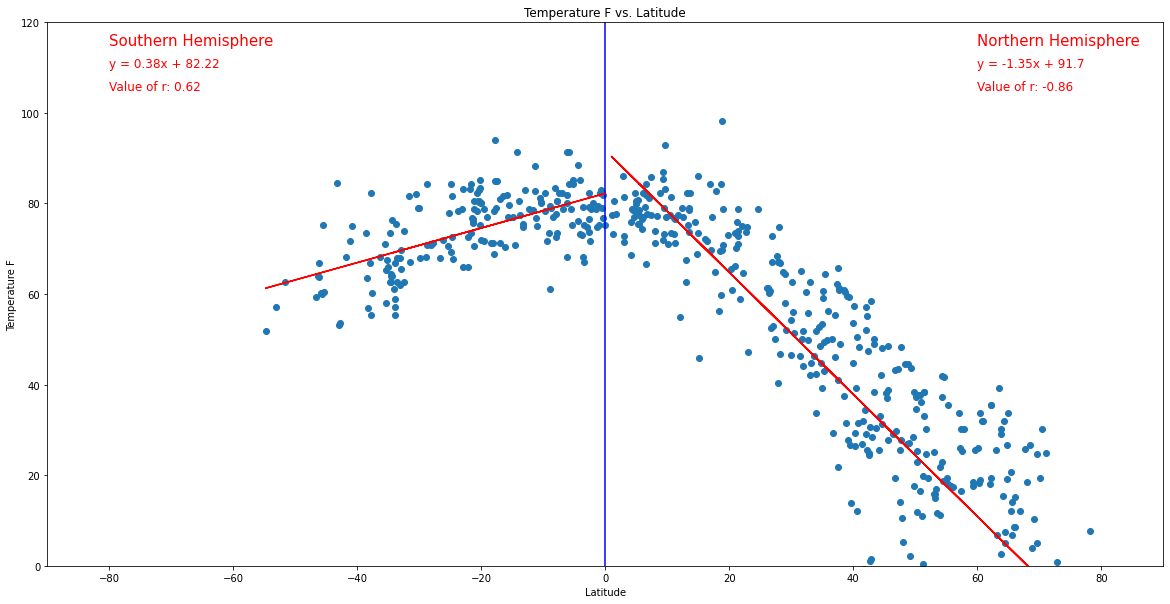

In [34]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Temperature F"
)
plt.savefig("images/temp_lat_linear_regression.png")

### Obersvation
#### Northern Hemisphere
- rvalue is -0.87.  The absolute value is greater than 0.7 
- Temperature and Latitude has strong correlation
- Temperature drops when Latitude in Northern Hemisphere increase
#### Southern Hemisphere
- rvalue is 0.52. The absolute value is greater than 0.5 and less then 0.7
- Temperature and Latitude has moderate correlation
- Notice that there is less cities when latitude is from -40 to -80

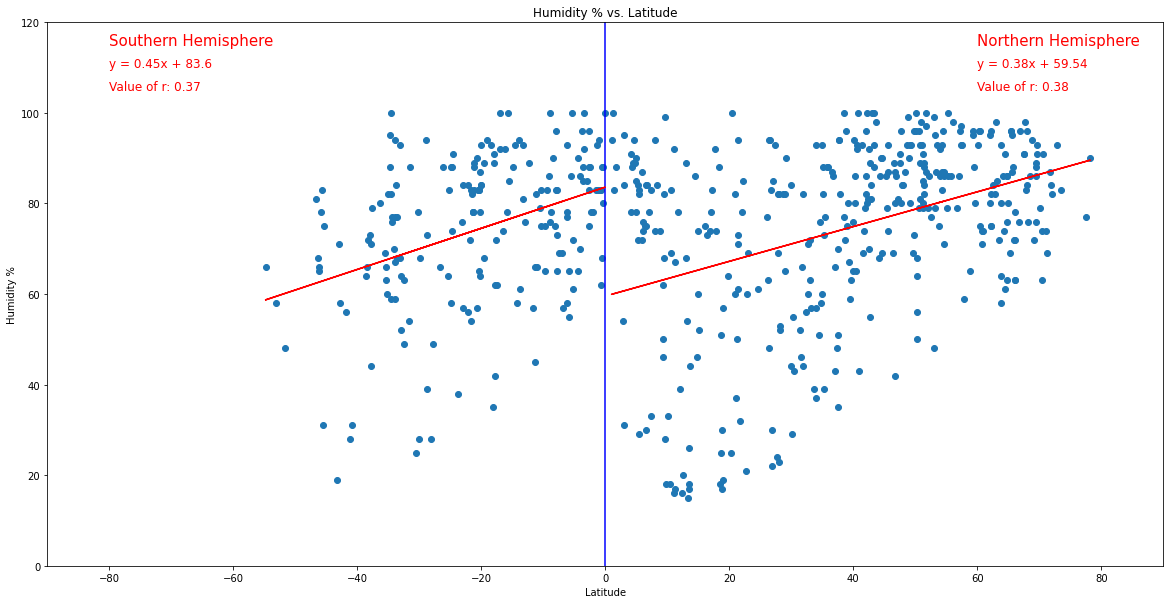

In [35]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Humidity %"
)
plt.savefig("images/humidity_lat_linear_regression.png")

### Obersvation
#### Northern Hemisphere
- rvalue is 0.41.  The absolute value is less than 0.5 and greater than 0.3.
- Humidity and Latitude has weak correlation
#### Southern Hemisphere
- rvalue is 0.26.  The absolute value is less than 0.3.
- Humidity and Latitude has none or very weak correlation


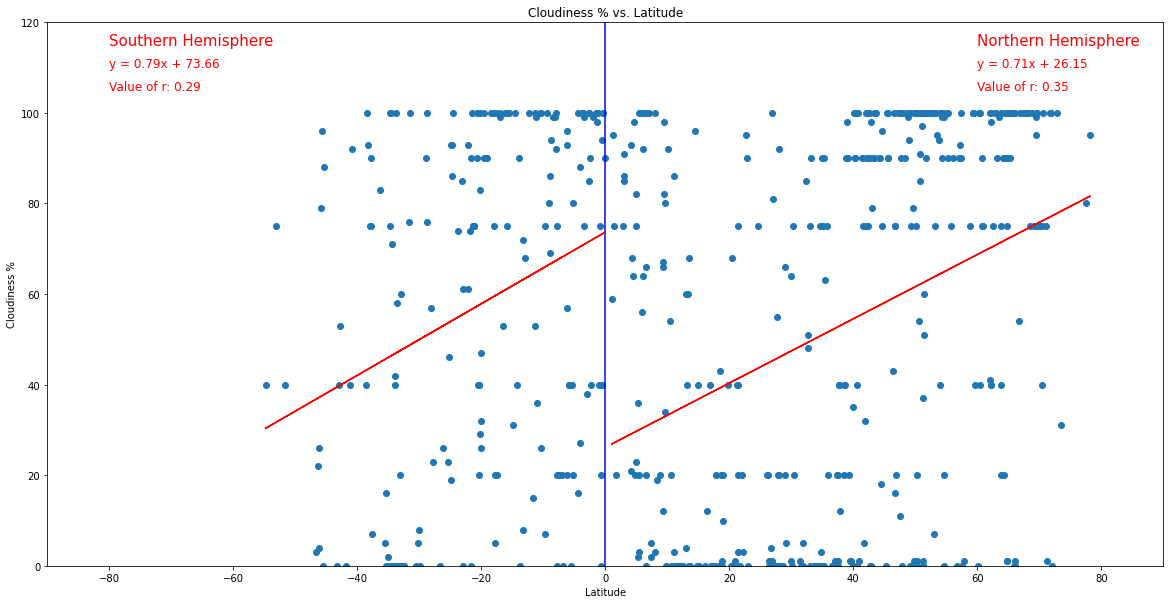

In [36]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Cloudiness %"
)
plt.savefig("images/cloudiness_lat_linear_regression.png")

### Obersvation
#### Northern Hemisphere
- rvalue is 0.39.  The absolute value is greater than 0.3 and less than 0.5 
- Cloudiness and Latitude has weak correlation
#### Southern Hemisphere
- rvalue is 0.22. The absolute value is less then 0.3
- Cloudiness and Latitude has none or very weak correlation

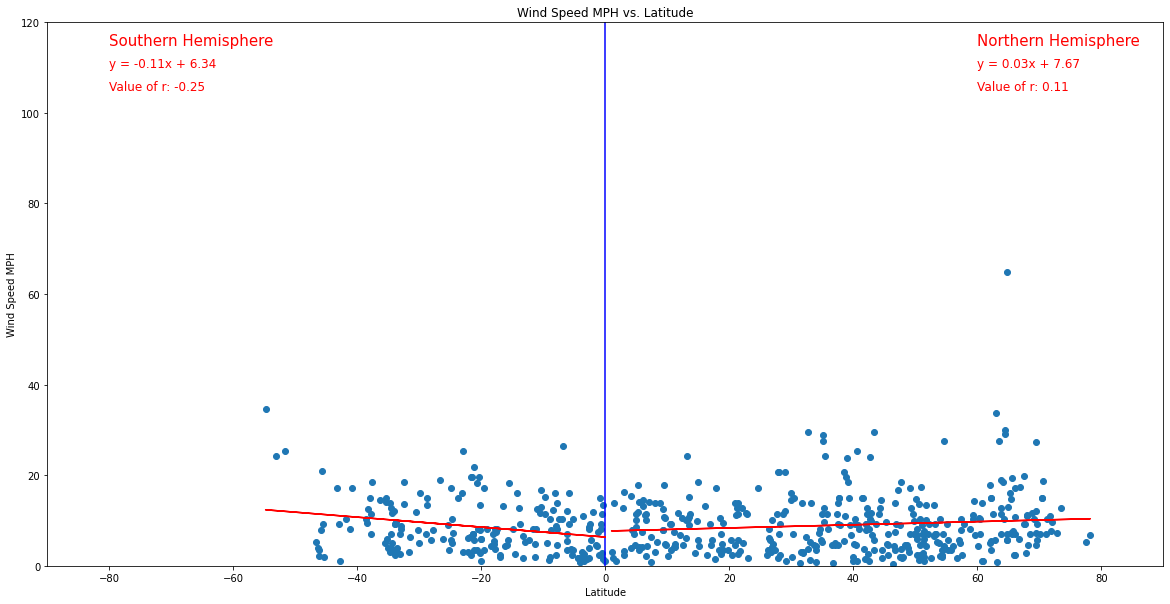

In [37]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Wind Speed MPH"
)
plt.savefig("images/wind_lat_linear_regression.png")

### Obersvation
#### Northern Hemisphere
- rvalue is 0.0.  
- Wind speed and Latitude has none correlation
#### Southern Hemisphere
- rvalue is -0.14. 
- Wind speed and Latitude has none correlation